# Check the effect of the bugs in the code

Load the libraries

In [61]:
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

## Load the data

In [2]:
idp = "idata/main_pdf_v0.8-b"

In [18]:
idp_old = "idata/main_pdf_v0.8"

In [6]:
lnew = Table.read(idp+"/lofar_m5.fits")

In [19]:
lold = Table.read(idp_old+"/lofar_m5.fits")

In [20]:
merged = join(lnew, lold, keys=["Source_Name"], table_names=["new", "old"])

### Check the shape of the data

In [21]:
len(lnew)

91332

In [22]:
len(lold)

91332

Compute the difference between the LR

In [65]:
diff_lr = merged['lr_5_old']-merged['lr_5_new']

In [66]:
len(diff_lr)

91332

## Explore the differences

Plot of the difference in LR with respect to the new LR

Text(0,0.5,'LR diff')

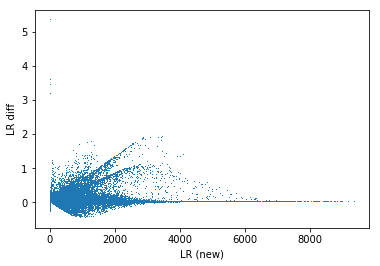

In [67]:
plt.plot(merged['lr_5_new'], diff_lr, marker=",", ls="")
plt.xlabel("LR (new)")
plt.ylabel("LR diff")

Plot of the absolute difference in LR with respect to the new LR in log space.

Text(0,0.5,'log abs. LR diff')

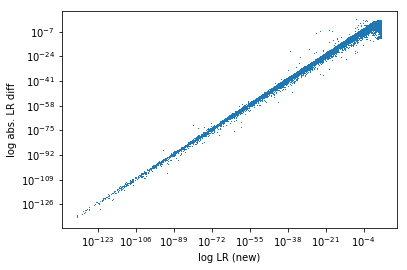

In [68]:
plt.loglog(merged['lr_5_new'], np.abs(diff_lr), marker=",", ls="")
plt.xlabel("log LR (new)")
plt.ylabel("log abs. LR diff")

Thresholds

In [38]:
told = 0.69787
tnew = 0.71684

Plot of the percentage of absolute difference in LR with respect to the new LR with the y axis in log space. Sources always below the threshold are plotted in orange.

Text(0,0.5,'log percent abs. LR diff')

/disk2/jsm/prog/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


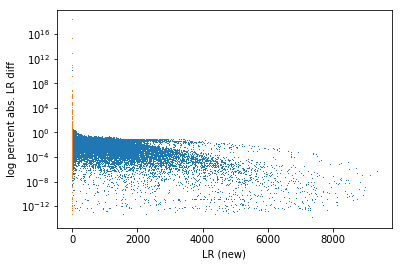

In [77]:
cond_sel = ((merged['lr_5_old'] >= told) | (merged['lr_5_new'] >= tnew))
cond_nosel = ((merged['lr_5_old'] < told) & (merged['lr_5_new'] < tnew))
plt.semilogy(merged['lr_5_new'][cond_sel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_sel], marker=",", ls="")
plt.semilogy(merged['lr_5_new'][cond_nosel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_nosel], marker=",", ls="")
plt.xlabel("LR (new)")
plt.ylabel("log percent abs. LR diff")

Plot of the percentage of absolute difference in LR with respect to the new LR in log space. Sources always below the threshold are plotted in orange and the galaxies that are not matched now are plotted as green crosses.

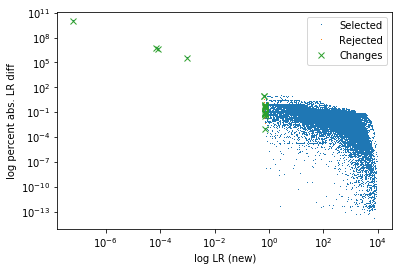

In [118]:
cond_sel = ((merged['lr_5_old'] >= told) | (merged['lr_5_new'] >= tnew)) & (~np.isnan(merged['category_old']))
cond_nosel = ((merged['lr_5_old'] < told) & (merged['lr_5_new'] < tnew)) & (~np.isnan(merged['category_old']))
cond_change = ((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew)) & (~np.isnan(merged['category_old']))
plt.loglog(merged['lr_5_new'][cond_sel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_sel], marker=",", ls="", label="Selected")
plt.loglog(merged['lr_5_new'][cond_nosel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_nosel], marker=",", ls="", label="Rejected")
plt.loglog(merged['lr_5_new'][cond_change], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_change], marker="x", ls="", label="Changes")
plt.xlabel("log LR (new)")
plt.ylabel("log percent abs. LR diff")
plt.legend()

The same plot than before but using the new threshol

/disk2/jsm/prog/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


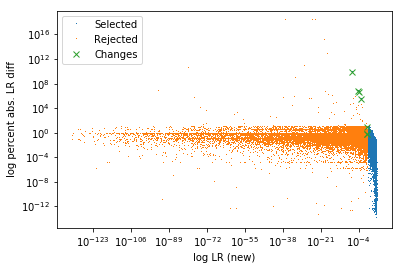

In [100]:
# Use new threshold for old data as well
cond_sel = ((merged['lr_5_old'] >= tnew) | (merged['lr_5_new'] >= tnew))
cond_nosel = ((merged['lr_5_old'] < tnew) & (merged['lr_5_new'] < tnew))
cond_change = ((merged['lr_5_old'] >= tnew) & (merged['lr_5_new'] < tnew))
plt.loglog(merged['lr_5_new'][cond_sel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_sel], marker=",", ls="", label="Selected")
plt.loglog(merged['lr_5_new'][cond_nosel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_nosel], marker=",", ls="", label="Rejected")
plt.loglog(merged['lr_5_new'][cond_change], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_change], marker="x", ls="", label="Changes")
plt.xlabel("log LR (new)")
plt.ylabel("log percent abs. LR diff")
plt.legend()

Direct comparison of the LR of the sources that changed. Most of them are close to the threshold change but in 4 cases there are big differences.

Text(0,0.5,'LR (old)')

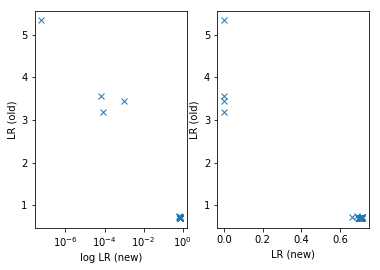

In [99]:
cond_change = ((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew))
plt.subplot(1,2,1)
plt.semilogx(merged['lr_5_new'][cond_change], merged['lr_5_old'][cond_change], marker="x", ls="")
plt.xlabel("log LR (new)")
plt.ylabel("LR (old)")
plt.subplot(1,2,2)
plt.plot(merged['lr_5_new'][cond_change], merged['lr_5_old'][cond_change], marker="x", ls="")
plt.xlabel("LR (new)")
plt.ylabel("LR (old)")

### Number of sources with respect to the thresholds

In [50]:
np.sum((merged['lr_5_old'] >= told) & (merged['lr_5_new'] >= tnew))

67188

In [87]:
np.sum((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew))

29

In [52]:
np.sum((merged['lr_5_old'] < told) & (merged['lr_5_new'] >= tnew))

0

In [53]:
np.sum((merged['lr_5_old'] < told) & (merged['lr_5_new'] < tnew))

24115

The percentage of changes due to the bug

In [102]:
4/91332*100

0.004379625979941313

In [105]:
cond_change = ((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew) & (np.abs(diff_lr)/merged['lr_5_new']*100 > 10))

In [106]:
merged[cond_change]

Source_Name,RA_new,E_RA_new,DEC_new,E_DEC_new,Peak_flux_new,E_Peak_flux_new,Total_flux_new,E_Total_flux_new,Maj_new,E_Maj_new,Min_new,E_Min_new,DC_Maj_new,E_DC_Maj_new,DC_Min_new,E_DC_Min_new,PA_new,E_PA_new,DC_PA_new,E_DC_PA_new,Isl_rms_new,S_Code_new,Mosaic_ID_new,Masked_Fraction_new,ID_flag_new,ID_name_new,ID_ra_new,ID_dec_new,ML_LR_new,LGZ_Size_new,LGZ_Width_new,LGZ_PA_new,LGZ_Assoc_new,LGZ_Assoc_Qual_new,LGZ_ID_Qual_new,AllWISE_new,objID_new,gFApFlux_new,gFApFluxErr_new,gFApMag_new,gFApMagErr_new,rFApFlux_new,rFApFluxErr_new,rFApMag_new,rFApMagErr_new,iFApFlux_new,iFApFluxErr_new,iFApMag_new,iFApMagErr_new,zFApFlux_new,zFApFluxErr_new,zFApMag_new,zFApMagErr_new,yFApFlux_new,yFApFluxErr_new,yFApMag_new,yFApMagErr_new,w1Flux_new,w1FluxErr_new,w1Mag_new,w1MagErr_new,w2Flux_new,w2FluxErr_new,w2Mag_new,w2MagErr_new,w3Flux_new,w3FluxErr_new,w3Mag_new,w3MagErr_new,w4Flux_new,w4FluxErr_new,w4Mag_new,w4MagErr_new,XrayClass_new,2RXS_ID_new,XMMSL2_ID_new,IRClass_new,z_spec_new,z_source_new,specAGN_new,mqcAGN_new,EBV_new,objName_new,z_best_new,z_best_source_new,z1_median_new,z1_min_new,z1_max_new,z1_area_new,z2_median_new,z2_min_new,z2_max_new,z2_area_new,chi_r_eazy_new,chi_r_atlas_new,chi_r_cosmos_new,chi_r_stellar_new,stellar_type_new,z_gpz_new,z_gpz_err_new,lr_i_new,lr_dist_i_new,lr_index_i_new,lr_index_sel_i_new,lr_w1_new,lr_dist_w1_new,lr_index_w1_new,lr_index_sel_w1_new,lr_index_1_new,lr_dist_1_new,lr_1_new,lr_type_1_new,category_new,W1mag_new,i_new,lr_index_2_new,lr_dist_2_new,lr_2_new,lr_index_sel_2_new,lr_index_3_new,lr_dist_3_new,lr_3_new,lr_index_sel_3_new,lr_index_4_new,lr_dist_4_new,lr_4_new,lr_index_sel_4_new,lr_index_5_new,lr_dist_5_new,lr_5_new,lr_index_sel_5_new,RA_old,E_RA_old,DEC_old,E_DEC_old,Peak_flux_old,E_Peak_flux_old,Total_flux_old,E_Total_flux_old,Maj_old,E_Maj_old,Min_old,E_Min_old,DC_Maj_old,E_DC_Maj_old,DC_Min_old,E_DC_Min_old,PA_old,E_PA_old,DC_PA_old,E_DC_PA_old,Isl_rms_old,S_Code_old,Mosaic_ID_old,Masked_Fraction_old,ID_flag_old,ID_name_old,ID_ra_old,ID_dec_old,ML_LR_old,LGZ_Size_old,LGZ_Width_old,LGZ_PA_old,LGZ_Assoc_old,LGZ_Assoc_Qual_old,LGZ_ID_Qual_old,AllWISE_old,objID_old,gFApFlux_old,gFApFluxErr_old,gFApMag_old,gFApMagErr_old,rFApFlux_old,rFApFluxErr_old,rFApMag_old,rFApMagErr_old,iFApFlux_old,iFApFluxErr_old,iFApMag_old,iFApMagErr_old,zFApFlux_old,zFApFluxErr_old,zFApMag_old,zFApMagErr_old,yFApFlux_old,yFApFluxErr_old,yFApMag_old,yFApMagErr_old,w1Flux_old,w1FluxErr_old,w1Mag_old,w1MagErr_old,w2Flux_old,w2FluxErr_old,w2Mag_old,w2MagErr_old,w3Flux_old,w3FluxErr_old,w3Mag_old,w3MagErr_old,w4Flux_old,w4FluxErr_old,w4Mag_old,w4MagErr_old,XrayClass_old,2RXS_ID_old,XMMSL2_ID_old,IRClass_old,z_spec_old,z_source_old,specAGN_old,mqcAGN_old,EBV_old,objName_old,z_best_old,z_best_source_old,z1_median_old,z1_min_old,z1_max_old,z1_area_old,z2_median_old,z2_min_old,z2_max_old,z2_area_old,chi_r_eazy_old,chi_r_atlas_old,chi_r_cosmos_old,chi_r_stellar_old,stellar_type_old,z_gpz_old,z_gpz_err_old,lr_i_old,lr_dist_i_old,lr_index_i_old,lr_index_sel_i_old,lr_w1_old,lr_dist_w1_old,lr_index_w1_old,lr_index_sel_w1_old,lr_index_1_old,lr_dist_1_old,lr_1_old,lr_type_1_old,category_old,W1mag_old,i_old,lr_index_2_old,lr_dist_2_old,lr_2_old,lr_index_sel_2_old,lr_index_3_old,lr_dist_3_old,lr_3_old,lr_index_sel_3_old,lr_index_4_old,lr_dist_4_old,lr_4_old,lr_index_sel_4_old,lr_index_5_old,lr_dist_5_old,lr_5_old,lr_index_sel_5_old
str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str11,float64,int64,str27,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str23,float64,float

In [129]:
cond = (np.abs(diff_lr)/merged['lr_5_new']*100 > 10)

In [130]:
merged[cond]
# ['Source_Name','ML_LR_new','AllWISE_new',
#  'objID_new','category_new','W1mag_new','i_new','lr_index_5_new',
#  'lr_dist_5_new','lr_5_new','lr_index_sel_5_new','ML_LR_old','AllWISE_old',
#  'objID_old','category_old','W1mag_old','i_old','lr_index_5_old',
#  'lr_dist_5_old','lr_5_old','lr_index_sel_5_old']

Source_Name,RA_new,E_RA_new,DEC_new,E_DEC_new,Peak_flux_new,E_Peak_flux_new,Total_flux_new,E_Total_flux_new,Maj_new,E_Maj_new,Min_new,E_Min_new,DC_Maj_new,E_DC_Maj_new,DC_Min_new,E_DC_Min_new,PA_new,E_PA_new,DC_PA_new,E_DC_PA_new,Isl_rms_new,S_Code_new,Mosaic_ID_new,Masked_Fraction_new,ID_flag_new,ID_name_new,ID_ra_new,ID_dec_new,ML_LR_new,LGZ_Size_new,LGZ_Width_new,LGZ_PA_new,LGZ_Assoc_new,LGZ_Assoc_Qual_new,LGZ_ID_Qual_new,AllWISE_new,objID_new,gFApFlux_new,gFApFluxErr_new,gFApMag_new,gFApMagErr_new,rFApFlux_new,rFApFluxErr_new,rFApMag_new,rFApMagErr_new,iFApFlux_new,iFApFluxErr_new,iFApMag_new,iFApMagErr_new,zFApFlux_new,zFApFluxErr_new,zFApMag_new,zFApMagErr_new,yFApFlux_new,yFApFluxErr_new,yFApMag_new,yFApMagErr_new,w1Flux_new,w1FluxErr_new,w1Mag_new,w1MagErr_new,w2Flux_new,w2FluxErr_new,w2Mag_new,w2MagErr_new,w3Flux_new,w3FluxErr_new,w3Mag_new,w3MagErr_new,w4Flux_new,w4FluxErr_new,w4Mag_new,w4MagErr_new,XrayClass_new,2RXS_ID_new,XMMSL2_ID_new,IRClass_new,z_spec_new,z_source_new,specAGN_new,mqcAGN_new,EBV_new,objName_new,z_best_new,z_best_source_new,z1_median_new,z1_min_new,z1_max_new,z1_area_new,z2_median_new,z2_min_new,z2_max_new,z2_area_new,chi_r_eazy_new,chi_r_atlas_new,chi_r_cosmos_new,chi_r_stellar_new,stellar_type_new,z_gpz_new,z_gpz_err_new,lr_i_new,lr_dist_i_new,lr_index_i_new,lr_index_sel_i_new,lr_w1_new,lr_dist_w1_new,lr_index_w1_new,lr_index_sel_w1_new,lr_index_1_new,lr_dist_1_new,lr_1_new,lr_type_1_new,category_new,W1mag_new,i_new,lr_index_2_new,lr_dist_2_new,lr_2_new,lr_index_sel_2_new,lr_index_3_new,lr_dist_3_new,lr_3_new,lr_index_sel_3_new,lr_index_4_new,lr_dist_4_new,lr_4_new,lr_index_sel_4_new,lr_index_5_new,lr_dist_5_new,lr_5_new,lr_index_sel_5_new,RA_old,E_RA_old,DEC_old,E_DEC_old,Peak_flux_old,E_Peak_flux_old,Total_flux_old,E_Total_flux_old,Maj_old,E_Maj_old,Min_old,E_Min_old,DC_Maj_old,E_DC_Maj_old,DC_Min_old,E_DC_Min_old,PA_old,E_PA_old,DC_PA_old,E_DC_PA_old,Isl_rms_old,S_Code_old,Mosaic_ID_old,Masked_Fraction_old,ID_flag_old,ID_name_old,ID_ra_old,ID_dec_old,ML_LR_old,LGZ_Size_old,LGZ_Width_old,LGZ_PA_old,LGZ_Assoc_old,LGZ_Assoc_Qual_old,LGZ_ID_Qual_old,AllWISE_old,objID_old,gFApFlux_old,gFApFluxErr_old,gFApMag_old,gFApMagErr_old,rFApFlux_old,rFApFluxErr_old,rFApMag_old,rFApMagErr_old,iFApFlux_old,iFApFluxErr_old,iFApMag_old,iFApMagErr_old,zFApFlux_old,zFApFluxErr_old,zFApMag_old,zFApMagErr_old,yFApFlux_old,yFApFluxErr_old,yFApMag_old,yFApMagErr_old,w1Flux_old,w1FluxErr_old,w1Mag_old,w1MagErr_old,w2Flux_old,w2FluxErr_old,w2Mag_old,w2MagErr_old,w3Flux_old,w3FluxErr_old,w3Mag_old,w3MagErr_old,w4Flux_old,w4FluxErr_old,w4Mag_old,w4MagErr_old,XrayClass_old,2RXS_ID_old,XMMSL2_ID_old,IRClass_old,z_spec_old,z_source_old,specAGN_old,mqcAGN_old,EBV_old,objName_old,z_best_old,z_best_source_old,z1_median_old,z1_min_old,z1_max_old,z1_area_old,z2_median_old,z2_min_old,z2_max_old,z2_area_old,chi_r_eazy_old,chi_r_atlas_old,chi_r_cosmos_old,chi_r_stellar_old,stellar_type_old,z_gpz_old,z_gpz_err_old,lr_i_old,lr_dist_i_old,lr_index_i_old,lr_index_sel_i_old,lr_w1_old,lr_dist_w1_old,lr_index_w1_old,lr_index_sel_w1_old,lr_index_1_old,lr_dist_1_old,lr_1_old,lr_type_1_old,category_old,W1mag_old,i_old,lr_index_2_old,lr_dist_2_old,lr_2_old,lr_index_sel_2_old,lr_index_3_old,lr_dist_3_old,lr_3_old,lr_index_sel_3_old,lr_index_4_old,lr_dist_4_old,lr_4_old,lr_index_sel_4_old,lr_index_5_old,lr_dist_5_old,lr_5_old,lr_index_sel_5_old
str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str11,float64,int64,str27,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str23,float64,float

In [136]:
cond = (np.abs(diff_lr)/merged['lr_5_new']*100 > 1)
merged[cond & (merged['lr_5_old'] >= told)]['Source_Name','ML_LR_new','AllWISE_new',
  'objID_new','category_new','W1mag_new','i_new','lr_index_5_new',
  'lr_dist_5_new','lr_5_new','lr_index_sel_5_new','ML_LR_old','AllWISE_old', 
  'objID_old','category_old','W1mag_old','i_old','lr_index_5_old',
  'lr_dist_5_old','lr_5_old','lr_index_sel_5_old']

Source_Name,ML_LR_new,AllWISE_new,objID_new,category_new,W1mag_new,i_new,lr_index_5_new,lr_dist_5_new,lr_5_new,lr_index_sel_5_new,ML_LR_old,AllWISE_old,objID_old,category_old,W1mag_old,i_old,lr_index_5_old,lr_dist_5_old,lr_5_old,lr_index_sel_5_old
str22,float64,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,float64,float64,float64
ILTJ112016.73+525526.1,nan,,--,2.0,14.370302613115205,13.522343412772015,1008170.0,1.563238179251965,1.2143972919559711,1008170.0,nan,,--,2.0,14.370302613115205,13.522343412772015,1008170.0,1.563238179251965,1.1920181703096706,1008170.0
ILTJ112021.43+554135.4,18.712744116837648,J112021.43+554136.1,174831700895502729,3.0,20.504828518813692,20.99944162151489,1372193.0,0.667373505914985,15.341199929109859,1372193.0,18.712744116837648,J112021.43+554136.1,174831700895502729,3.0,20.504828518813692,20.99944162151489,1372193.0,0.667373505914985,15.629374190311385,1372193.0
ILTJ112141.49+535249.4,nan,,--,2.0,15.783605501826989,15.689478557355756,1119593.0,2.0738478253683525,0.9591483302700711,1119593.0,nan,,--,2.0,15.783605501826989,15.689478557355756,1119593.0,2.0738478253683525,1.026389908349005,1119593.0
ILTJ112234.48+492305.3,9.949187804478631,J112234.44+492306.1,167261706436142536,2.0,19.79018881219394,19.753938108930445,434969.0,0.25668186999064735,9.1180466041256,434969.0,9.949187804478631,J112234.44+492306.1,167261706436142536,2.0,19.79018881219394,19.753938108930445,434969.0,0.25668186999064735,8.90432464264227,434969.0
ILTJ112244.04+524817.0,4.449101983104592,J112243.93+524815.7,171361706829985920,3.0,20.314310102134076,20.724413669317432,977423.0,1.6175120202818933,6.06540552509655,977423.0,4.449101983104592,J112243.93+524815.7,171361706829985920,3.0,20.314310102134076,20.724413669317432,977423.0,1.6175120202818933,6.147968694289568,977423.0
ILTJ112249.37+533312.5,2.32587743394617,J112249.25+533311.5,172261707053254429,3.0,17.00244704238907,17.27994281281367,1073080.0,1.5419252659713591,10.284900840664077,1073080.0,2.32587743394617,J112249.25+533311.5,172261707053254429,3.0,17.00244704238907,17.27994281281367,1073080.0,1.5419252659713591,10.447442903143022,1073080.0
ILTJ112251.22+512601.4,4.820976155770548,J112251.16+512601.0,169721707131631078,3.0,20.713861775732763,21.05036419190562,797699.0,0.7452647762767879,6.369486152957047,797699.0,4.820976155770548,J112251.16+512601.0,169721707131631078,3.0,20.713861775732763,21.05036419190562,797699.0,0.7452647762767879,6.494068032057322,797699.0
ILTJ112308.82+492150.9,9.289887691940335,J112308.81+492151.3,167231707866327762,2.0,19.666306189555364,19.549675942638018,464940.0,0.3304275654513652,8.898929305167043,464940.0,9.289887691940335,J112308.81+492151.3,167231707866327762,2.0,19.666306189555364,19.549675942638018,464940.0,0.3304275654513652,8.690343331797264,464940.0
ILTJ112350.77+465114.1,3.5945271838763024,J112350.73+465115.2,164221709613965680,2.0,17.272723215326966,17.130722822312773,25384.0,0.9614877588937444,2.1026551437311816,25384.0,3.5945271838763024,J112350.73+465115.2,164221709613965680,2.0,17.272723215326966,17.130722822312773,25384.0,0.9614877588937444,2.0662844803650486,25384.0


In [138]:
cond = (np.abs(diff_lr)/merged['lr_5_new']*100 > 1)
merged[cond & (merged['lr_5_old'] >= told) & (merged['lr_index_5_old'] != merged['lr_index_5_new'])]['Source_Name','ML_LR_new','AllWISE_new',
  'objID_new','category_new','W1mag_new','i_new','lr_index_5_new',
  'lr_dist_5_new','lr_5_new','lr_index_sel_5_new','ML_LR_old','AllWISE_old', 
  'objID_old','category_old','W1mag_old','i_old','lr_index_5_old',
  'lr_dist_5_old','lr_5_old','lr_index_sel_5_old']

Source_Name,ML_LR_new,AllWISE_new,objID_new,category_new,W1mag_new,i_new,lr_index_5_new,lr_dist_5_new,lr_5_new,lr_index_sel_5_new,ML_LR_old,AllWISE_old,objID_old,category_old,W1mag_old,i_old,lr_index_5_old,lr_dist_5_old,lr_5_old,lr_index_sel_5_old
str22,float64,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,float64,float64,float64
ILTJ114909.78+494632.8,nan,,--,nan,nan,nan,491914.0,7.224609103268076,0.0010002481805411474,nan,nan,,--,0.0,12.810946568452223,nan,3391544.0,3.5470665894399405,3.4457438069232436,3391544.0
